# Exercise 9

## Mashable news stories analysis

Predicting if a news story is going to be popular


In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/mashable.csv'
train_df = pd.read_csv(url, index_col=0)
train_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [2]:
train_df.shape

(6000, 61)

In [0]:
X = train_df.drop(['url', 'Popular'], axis=1)
y = train_df['Popular']

In [4]:
y.mean()

0.5

In [0]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
X_train.shape

(4500, 59)

# Exercise 9.1

Estimate a Decision Tree Classifier and a Logistic Regresion

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

X_test_n = pd.DataFrame(preprocessing.normalize(X_test,), index=X_test.index, columns=X_test.columns)
X_train_n = pd.DataFrame(preprocessing.normalize(X_train), index=X_train.index, columns=X_train.columns)


models = {'lr': LogisticRegression(solver='lbfgs'),
          'dt': DecisionTreeClassifier()
          }

for model in models.keys():
    models[model].fit(X_train_n, y_train)

In [8]:
y_pred = pd.DataFrame(index=y_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test_n)
    
for model in models.keys():
    print('accuracy_score: ',model,metrics.accuracy_score(y_pred[model], y_test) )
    
for model in models.keys():
    print('f1_score: ',model, metrics.f1_score(y_pred[model], y_test) )


accuracy_score:  lr 0.5413333333333333
accuracy_score:  dt 0.5613333333333334
f1_score:  lr 0.5300546448087432
f1_score:  dt 0.5493150684931507


# Exercise 9.2

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

models2 = {'DecisionTree01': DecisionTreeClassifier(max_depth=None),
           'DecisionTre02': DecisionTreeClassifier(max_depth=2),
          'LogisticReg': LogisticRegression( solver='lbfgs')
          }


for model in models2.keys():
  models2[model].fit(X_train_n, y_train)

for model in models2.keys():
  models2[model].fit(X_train_n, y_train)

y_pred = pd.DataFrame(index=y_test.index, columns=models2.keys())
for model in models2.keys():
  y_pred[model] = models2[model].predict(X_test_n)    
  
for model in models2.keys():
    print('accuracy_score: ',model,'=',metrics.accuracy_score(y_pred[model], y_test) )
print('\n')    
for model in models2.keys():
    print('f1_score: ',model,'=',metrics.f1_score(y_pred[model], y_test) )

print('\nResults after Baggin:')
    
bc1 = BaggingClassifier(DecisionTreeClassifier(max_depth=None), n_estimators=100, bootstrap=True, oob_score=True, random_state=1).fit(X=X_train_n, y=y_train)
print('accuracy_score: ','DecisionTree01=',metrics.accuracy_score(bc1.predict(X_test_n), y_test) )
print('f1_score: ','DecisionTree01=',metrics.f1_score(bc1.predict(X_test_n), y_test) )

bc2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, bootstrap=True, oob_score=True, random_state=1).fit(X=X_train_n, y=y_train)
print('accuracy_score: ','DecisionTre02=',metrics.accuracy_score(bc2.predict(X_test_n), y_test) )
print('f1_score: ','DecisionTre02=',metrics.f1_score(bc2.predict(X_test_n), y_test) )

bc3 = BaggingClassifier(LogisticRegression( solver='lbfgs'), n_estimators=100, bootstrap=True, oob_score=True, random_state=1).fit(X=X_train_n, y=y_train)
print('accuracy_score: ','LogisticReg=',metrics.accuracy_score(bc3.predict(X_test_n), y_test) )
print('f1_score: ','LogisticReg=',metrics.f1_score(bc3.predict(X_test_n), y_test) )


accuracy_score:  DecisionTree01 = 0.5606666666666666
accuracy_score:  DecisionTre02 = 0.624
accuracy_score:  LogisticReg = 0.5413333333333333


f1_score:  DecisionTree01 = 0.5439446366782008
f1_score:  DecisionTre02 = 0.6389244558258642
f1_score:  LogisticReg = 0.5300546448087432

Results after Baggin:
accuracy_score:  DecisionTree01= 0.644
f1_score:  DecisionTree01= 0.650523560209424
accuracy_score:  DecisionTre02= 0.634
f1_score:  DecisionTre02= 0.6518706404565631
accuracy_score:  LogisticReg= 0.5426666666666666
f1_score:  LogisticReg= 0.5281980742778543


# Exercise 9.3

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [10]:
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(estimators=models2.items(),voting='soft',)
ensemble_model.fit(X_train_n,y_train)
predicted_labels = pd.DataFrame(ensemble_model.predict(X_test_n))

print('Accuracy Score:\t',metrics.accuracy_score(y_test,predicted_labels))
print('F1 Score:\t',metrics.f1_score(y_test,predicted_labels))

Accuracy Score:	 0.5413333333333333
F1 Score:	 0.5268225584594224


# Exercise 9.4

Estimate te probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [11]:
predict_prob = pd.DataFrame(ensemble_model.predict_proba(X_test_n))
num_obs_test =  predict_prob.shape[0]

threshold=0.1
print('Con threshold=',threshold,'la probabilidad de ser positivo (1) es:',sum(np.where(predict_prob[1] > threshold,1,0)) / num_obs_test)

threshold=0.25
print('Con threshold=',threshold,'la probabilidad de ser positivo (1) es:',sum(np.where(predict_prob[1] > threshold,1,0)) / num_obs_test)

threshold=0.5
print('Con threshold=',threshold,'la probabilidad de ser positivo (1) es:',sum(np.where(predict_prob[1] > threshold,1,0)) / num_obs_test)

threshold=0.75
print('Con threshold=',threshold,'la probabilidad de ser positivo (1) es:',sum(np.where(predict_prob[1] > threshold,1,0)) / num_obs_test)

threshold=1
print('Con threshold=',threshold,'la probabilidad de ser positivo (1) es:',sum(np.where(predict_prob[1] > threshold,1,0)) / num_obs_test)


threshold=0.28
print('Con threshold=',threshold,' el valor de F1_score  es:',metrics.f1_score(y_test,np.where(predict_prob[[1]] > threshold,1,0))    )


Con threshold= 0.1 la probabilidad de ser positivo (1) es: 1.0
Con threshold= 0.25 la probabilidad de ser positivo (1) es: 0.9506666666666667
Con threshold= 0.5 la probabilidad de ser positivo (1) es: 0.4653333333333333
Con threshold= 0.75 la probabilidad de ser positivo (1) es: 0.006666666666666667
Con threshold= 1 la probabilidad de ser positivo (1) es: 0.0
Con threshold= 0.28  el valor de F1_score  es: 0.6933728981206726


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5, 1.0, 'F1_score vs threshold')

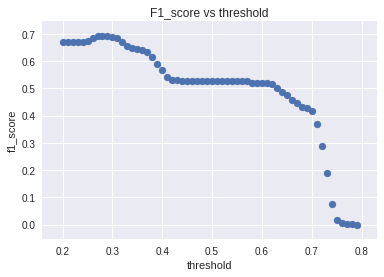

In [12]:

result=[]
result2=[]
list = [x * 0.01 for x in range(20, 80)]
for threshold in list:
  result2.append( metrics.f1_score(y_test, np.where(predict_prob[1] > threshold,1,0)  ) )

%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel('threshold')
plt.ylabel('f1_score')
plt.scatter(x=list,y=result2,)
plt.title('F1_score vs threshold')


# Exercise 9.5

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [13]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf.fit(X_train_n, y_train)
y_pred = clf.predict(X_test_n)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6431833007175473, 0.6353333333333333)

In [14]:
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test_n.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train_n.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.26640926640926643, 0.49333333333333335)

# Exercise 9.6

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

Text(0.5, 1.0, 'OOB error of each tree')

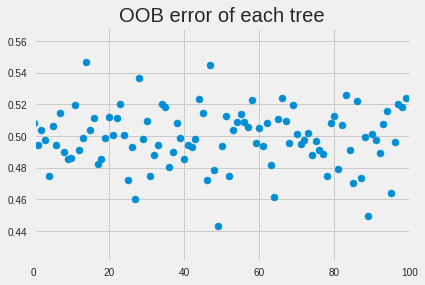

In [15]:
n_estimators=100
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)
n_samples = X_train.shape[0]

# create bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]



trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=seeds[i])
    trees[i].fit(X_train_n.iloc[samples[i]], y_train.iloc[samples[i]])
    
samples_oob = []
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))
    
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)
    
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree')    

# Exercise 9.7

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [16]:
from sklearn.linear_model import LogisticRegressionCV
X_train_2 = pd.DataFrame(index=X_train_n.index, columns=range(n_estimators))
y_pred_df = pd.DataFrame(index=y_test.index, columns=range(n_estimators))

for i in range(n_estimators):
    X_train_2[i] = trees[i].predict(X_train)

lr = LogisticRegressionCV(cv = 5 , max_iter=1000)
lr.fit(X_train_2, y_train)

lr.coef_

array([[ 0.05873583, -0.00114935,  0.04973181, -0.00188434,  0.02935408,
         0.05451919,  0.03158501,  0.00787733,  0.01525541, -0.03163175,
        -0.00366319, -0.09546606,  0.0485948 , -0.03223921, -0.08313875,
        -0.0036231 ,  0.00053979,  0.10715965,  0.02739682,  0.00627743,
         0.00167565, -0.0084381 ,  0.00672026,  0.00924788,  0.02644709,
         0.10342363, -0.01308036,  0.08259193, -0.07045796,  0.        ,
        -0.01604788,  0.00815074,  0.08830452,  0.02087717, -0.06779152,
        -0.12748022,  0.01466871, -0.05354613,  0.02554881,  0.0293874 ,
         0.0458003 ,  0.02134442,  0.05696664,  0.00146631,  0.01647079,
        -0.02853985,  0.04799482, -0.06978344,  0.05662976,  0.19707558,
         0.00925706, -0.0284223 ,  0.05627854,  0.0118416 , -0.02870555,
        -0.0230087 ,  0.00188384,  0.00684358, -0.11587964,  0.01084352,
        -0.04389456,  0.        ,  0.00416232,  0.03752433,  0.04422085,
         0.00142685, -0.0163188 , -0.00344269, -0.0

In [17]:
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred = lr.predict(y_pred_df)


metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)


(0.6095979247730221, 0.5986666666666667)

In [18]:
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))
X_train_3 = np.zeros((X_train.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):

    X_train_3[:, i] = clf.estimators_[i].predict(X_train)
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
lr = LogisticRegressionCV(cv=5,max_iter=1000)
lr.fit(X_train_3, y_train)

y_pred = lr.predict(y_pred_all_)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.533066132264529, 0.534)